# 비 합법적적

## 크롤링 코드

In [5]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.naver.com/'

# url 변수에 담긴 html 문서를 불러와서 출력함
req = requests.get(url)
print(req.status_code)
# .status_code : 사이트가 제대로 초기화 되었는지 확인하는 명령어
# 200 : 제대로 된 사이트가 초기화됨 , 404 : 찾을 수 없는 사이트가 초기화됨

200



<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메
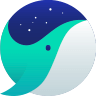
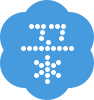

In [6]:
print(req.text)

## 실습. 네이버 헤드 뉴스 찾기
- 헤드라인 뉴스

In [64]:
# crawling.py
import requests 
from bs4 import BeautifulSoup 

def crawling(soup):
  print(type(soup))

  div = soup.find("div", class_ = 'list_body newsflash_body')
  # print(div)
  # print(div.find_all("a"))
  result = []
  for a in div.find_all("a"):
    result.append(print(a.get_text()))

  result = result[1:]
  return result
    

def main():
  
  custom_header = {
      'referer' : 'https://www.naver.com/',
      'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'
  } 

  url = 'https://news.naver.com/main/list.naver?mode=LPOD&mid=sec&sid1=001&sid2=140&oid=001&isYeonhapFlash=Y'
  
  req = requests.get(url, headers = custom_header)
  print(type(req.text))

  # 파싱
  soup = BeautifulSoup(req.text, "html.parser")
  result = crawling(soup)
  print(result)

if __name__ == "__main__":
  main()


<class 'str'>
<class 'bs4.BeautifulSoup'>


홍성·대전 산불 이틀째…헬기 투입되며 진화 속도
산림청장 "홍성·대전 산불 오늘 중 완진 목표…강풍이 변수"
이틀째 꺼지지 않는 옥천 산불…밤새 20㏊ 소실
법원, '서해 피격 은폐' 서훈 前안보실장 보석 허가
尹대통령 "정부, 4·3 희생자·유족 명예회복 위해 최선다할 것"
인왕산 밤샘 진화작업 …"98% 껐지만 완진 쉽지 않아"
尹 "모든 정부 기관, BIE실사단 방한일정 지원 만전 기하라"
한일, 尹 방미 전 NSC 경제안보대화 추진…안보대화도 병행
한미일, 3∼4일 제주 남방서 대잠전훈련…北SLBM 대응능력 향상
금리인상 따른 주택가격 하락으로 민간소비 증가속도 둔화 전망
대전조차장역 SRT열차 탈선 원인은 온도상승으로 인한 선로변형
신복위, 취약계층 채무조정 확대…"원리금 상환 부담 완화"
[None, None, None, None, None, None, None, None, None, None, None, None]


## 벅스뮤직 차트 가져오기

In [81]:
import requests
from bs4 import BeautifulSoup 

def crawling(soup):
  
  result = []
  tbody = soup.find("tbody")
  p_tags = tbody.find_all("p", class_ = "title")
  for p in p_tags:
    result.append(p.get_text().replace("\n", ''))

    return result
  

def main():
  custom_header = {
      'referer' : 'https://music.bugs.co.kr/',
      'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36'
  }

  url = 'https://music.bugs.co.kr/chart'
  req = requests.get(url, headers = custom_header)
  soup = BeautifulSoup(req.text, 'html.parser')
  result = crawling(soup)
  print(result)  

if __name__ == "__main__":
  main()

# 합법적인 코드

## XML

참고 : https://docs.python.org/ko/3/tutorial/inputoutput.html

In [102]:
import requests
import lxml
import pandas as pd
from bs4 import BeautifulSoup

KEY = '1308370912'  # 외부파일 지정. 암호화해서 불러옴
url = f'http://data.ex.co.kr/openapi/trtm/realUnitTrtm?key={KEY}&type=xml&iStartUnitCode=101&iEndUnitCode=103&sumTmUnitTypeCode=2&numOfRows=10&pageNo=1'
print(url)

http://data.ex.co.kr/openapi/trtm/realUnitTrtm?key=1308370912&type=xml&iStartUnitCode=101&iEndUnitCode=103&sumTmUnitTypeCode=2&numOfRows=10&pageNo=1


In [109]:
%%time

result = requests.get(url)
content = result.content
soup = BeautifulSoup(content, "lxml")
# print(soup.prettify())

# 3개의 출력변수를 선택하고, 데이터 프레임으로 만들기
stddates = []
stdtimes = []

date_list = soup.find_all('stddate')
time_list = soup.find_all('stdtime')

"""
for date, time in zip(date_list, time_list):
  stddates.append(date.get_text())
  stdtimes.append(time.get_text())

for date in date_list:
  stddates.append(date.get_text())

for time in time_list:
  stdtimes.append(time.get_text())
"""
[(date_list, time_list) for date_list in range(5) for time_list in range(5)]

df = pd.DataFrame({
    'date'  : stddates,
    'time' : stdtimes 
})

# CPU times: user 20.4 ms, sys: 635 µs, total: 21 ms
# CPU times: user 26.8 ms, sys: 862 µs, total: 27.7 ms
df


CPU times: user 24.6 ms, sys: 3.22 ms, total: 27.8 ms
Wall time: 1.69 s


/usr/local/lib/python3.9/dist-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


,date,time


## JSON

In [111]:
import requests
import pandas as pd

url = "http://data.ex.co.kr/openapi/trtm/realUnitTrtm?key=1308370912&type=json&iStartUnitCode=101&iEndUnitCode=103"

In [113]:
responses = requests.get(url)
print(responses)

<Response [200]>


In [119]:
json_df = responses.json()
data = json_df['realUnitTrtmVO']

records = []
for idx in data:
  idx_dict = {}
  idx_dict['date'] = idx['stdDate']
  idx_dict['time'] = idx['stdTime']
  idx_dict['startUnitNm'] = idx['startUnitNm']
  idx_dict['endUnitNm'] = idx['endUnitNm']
  print(idx_dict)
  records.append(idx_dict)

  df = pd.DataFrame(records)
  df.to_csv("result.csv", index=False)


{'date': '20230403', 'time': '02:50', 'startUnitNm': '서울', 'endUnitNm': '수원신갈'}
{'date': '20230403', 'time': '02:55', 'startUnitNm': '서울', 'endUnitNm': '수원신갈'}
{'date': '20230403', 'time': '03  ', 'startUnitNm': '서울', 'endUnitNm': '수원신갈'}
{'date': '20230403', 'time': '03:00', 'startUnitNm': '서울', 'endUnitNm': '수원신갈'}
{'date': '20230403', 'time': '03:05', 'startUnitNm': '서울', 'endUnitNm': '수원신갈'}
{'date': '20230403', 'time': '03:10', 'startUnitNm': '서울', 'endUnitNm': '수원신갈'}
{'date': '20230403', 'time': '03:15', 'startUnitNm': '서울', 'endUnitNm': '수원신갈'}
{'date': '20230403', 'time': '03:20', 'startUnitNm': '서울', 'endUnitNm': '수원신갈'}
{'date': '20230403', 'time': '03:25', 'startUnitNm': '서울', 'endUnitNm': '수원신갈'}
{'date': '20230403', 'time': '03:30', 'startUnitNm': '서울', 'endUnitNm': '수원신갈'}


In [ ]:
# pandas 데이터프레임으로 변환
# 임의의 출력변수만 3개 선택
